# Аналіз впливу у лінійній регресії

## Yuriy Ryzhkin

### Варіант 4

In [1]:
# read file names from folder 
folder <- paste(getwd(),'/data',sep = '')
filenames=list.files(path = folder,full.names=TRUE)

In [2]:
#create list with dataframes from /data folder
datalist = lapply(filenames,
                  function (x){
                      a <- unlist(strsplit(x,'[_.]'));
                      company <- a[length(a)-1];
                      x0<- read.csv(x,header = F)[,c(1,6)];# using ol
                      colnames(x0)<-c('date',company);
                      x0;
                  })
#merge tables to one
y<-Reduce(function(x,y) {merge(x,y,by="date")}, datalist)

In [3]:
df<-y[-nrow(y),-1]
df$tomorrow_apd <- y$apd[-1]
head(df)
#columns is closed prices of companies

,amgn,amp,amt,amzn,an,anf,aon,apa,apc,apd,tomorrow_apd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,76.6332,29.6218,24.1784,45.99,19.86,44.4525,28.5404,70.9727,45.7598,46.0207,46.3674
2,77.1332,29.2406,24.0615,44.90,19.82,43.6285,28.6119,67.7776,43.4416,46.3674,45.0466
3,75.1332,29.0327,23.4377,44.47,19.50,43.2032,28.8173,65.2821,42.0754,45.0466,44.7825
4,72.9025,28.9114,23.3305,44.03,19.30,45.8170,28.3797,62.0681,41.9374,44.7825,45.3108
5,74.0948,29.0240,23.5547,43.66,19.29,46.1359,28.4154,62.8432,42.7276,45.3108,44.8073
6,73.8929,28.6428,23.0772,43.78,19.21,45.2056,27.9508,62.4178,42.4134,44.8073,44.6422


Давайте спробуємо спрогнозувати завтрішню ціну компанії apd, використовуючи ціни 9 інших компаній.

Lets try predict tomorrow price of apd company from other nine companies

In [4]:
number_rows<-nrow(df)
model_other_companies<-lm(tomorrow_apd~.-tomorrow_apd-apd,data=df[(number_rows-50):number_rows,])
summary(model_other_companies)


Call:
lm(formula = tomorrow_apd ~ . - tomorrow_apd - apd, data = df[(number_rows - 
    50):number_rows, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4701 -0.9844 -0.2693  1.2882  6.7459 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 94.76930   28.01091   3.383 0.001586 ** 
amgn         0.50324    0.14089   3.572 0.000923 ***
amp          1.93001    0.44679   4.320 9.68e-05 ***
amt         -0.14082    0.20870  -0.675 0.503606    
amzn        -0.07957    0.04901  -1.623 0.112171    
an          -0.15408    0.41761  -0.369 0.714062    
anf         -0.10216    0.32151  -0.318 0.752286    
aon         -1.36207    0.57489  -2.369 0.022615 *  
apa         -0.15864    0.23441  -0.677 0.502359    
apc         -0.70754    0.31802  -2.225 0.031656 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.926 on 41 degrees of freedom
Multiple R-squared:  0.8955,	Adjusted R-squared:  0.8725 
F-statistic: 39.0

Наше p-value: < 2.2e-16, що говорить нам про те, що наша ціна доволі сильно корелює з вчорашніми цінами авіакомпаній.
Як ми бачимо у нас доволі непогана  метрика Multiple R-squared.
Наша змінна значущо залежить від декількох регресорів , а саме apc,aon,amp,amgn. Рівень alpha беремо, як 0.05


Давайте тепер спробуємо прибрати незначущі регресори і побудувати регресію вже на них

In [5]:
model_signif_companies <-lm(tomorrow_apd~apc+aon+amp+amgn ,data=df[(number_rows-50):number_rows,])
summary(model_signif_companies)


Call:
lm(formula = tomorrow_apd ~ apc + aon + amp + amgn, data = df[(number_rows - 
    50):number_rows, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6081 -1.2058 -0.3661  1.2199  6.5928 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  74.7424    16.3116   4.582 3.52e-05 ***
apc          -1.0057     0.2226  -4.517 4.35e-05 ***
aon          -1.3375     0.5165  -2.590   0.0128 *  
amp           1.7313     0.2654   6.524 4.73e-08 ***
amgn          0.5304     0.1177   4.508 4.49e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.925 on 46 degrees of freedom
Multiple R-squared:  0.8829,	Adjusted R-squared:  0.8728 
F-statistic: 86.75 on 4 and 46 DF,  p-value: < 2.2e-16


Multiple R-squared ненабагато зменшився, що говорить, що в відкинутих регресорах було мало даних.

Спробуємо тепер використати в прогнозуванні вчорашню ціну нашої компанії

In [9]:
model_all <-lm(tomorrow_apd~.-tomorrow_apd,data=df[(number_rows-50):number_rows,])
summary(model_all)


Call:
lm(formula = tomorrow_apd ~ . - tomorrow_apd, data = df[(number_rows - 
    50):number_rows, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4658 -0.7668 -0.1917  0.6829  6.1666 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 46.32546   25.25717   1.834   0.0741 .  
amgn         0.20742    0.13219   1.569   0.1245    
amp          0.45083    0.48760   0.925   0.3607    
amt         -0.15192    0.17100  -0.888   0.3796    
amzn        -0.02942    0.04161  -0.707   0.4836    
an          -0.30113    0.34363  -0.876   0.3861    
anf          0.20647    0.27184   0.760   0.4520    
aon         -0.51409    0.50590  -1.016   0.3156    
apa         -0.21741    0.19247  -1.130   0.2654    
apc         -0.02170    0.30032  -0.072   0.9428    
apd          0.71306    0.15529   4.592  4.3e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.578 on 40 degrees of freedom
Multiple R-squared:  0.9316,

Показник Multiple R-squared збільшився, але при цьому знащучим в прогнозуванні виявився лише один регресор, а саме apd,або сьогоднішня ціна на нашу компанію.

Спробуємо тепер використати лише вчорашню ціну

In [8]:
model_yesterday <-lm(tomorrow_apd~apd,data=df[(number_rows-50):number_rows,])
summary(model_all)


Call:
lm(formula = tomorrow_apd ~ apd, data = df[(number_rows - 50):number_rows, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0942 -0.5212 -0.0511  0.3741  6.3387 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.99613    4.11481   0.485     0.63    
apd          0.98205    0.04219  23.276   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.57 on 49 degrees of freedom
Multiple R-squared:  0.9171,	Adjusted R-squared:  0.9154 
F-statistic: 541.8 on 1 and 49 DF,  p-value: < 2.2e-16


Наше припущення справдилось. Дійсно, наша завтрішня ціна доволі сильно корелює з нашою сьогоднішньою. При цьому судячи по відносно невеликому зміненні Multiple R-squared інші регресори все таки не сильно впливають на нашу модель.

### Графічний аналіз 

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
1926,0.8682561,0.44940748,0.061904278
1927,-1.8875730,0.28874168,0.136130804
1930,-1.6579400,0.31522353,0.121357802
1947,-2.0629093,0.17687934,0.084720700
1962,0.0965251,0.41353377,0.000673242
1965,4.2822092,0.04837357,0.065511097


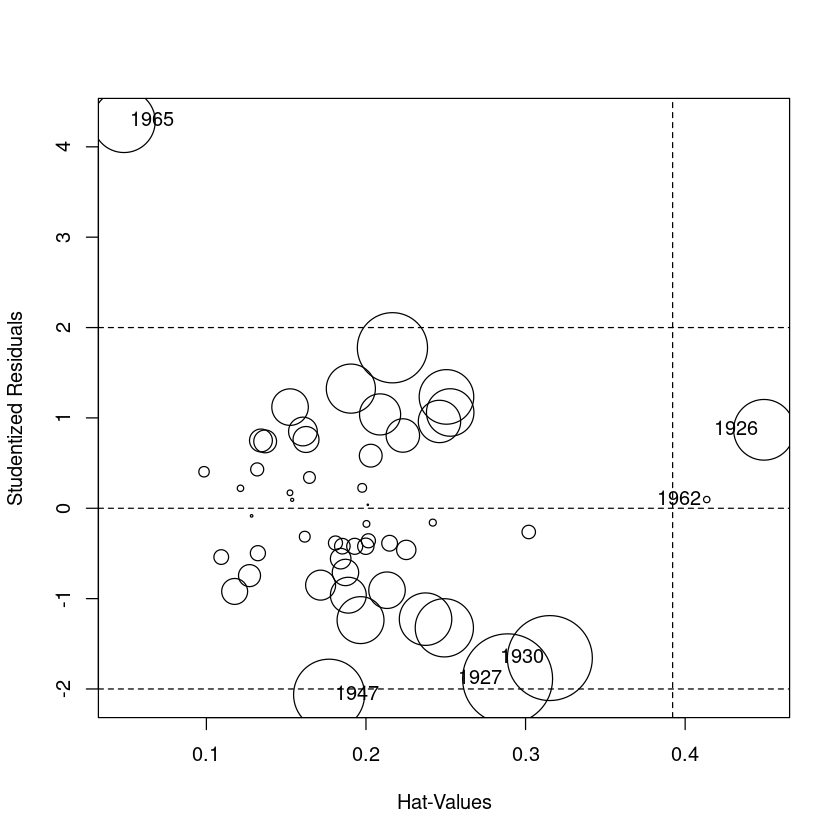

In [21]:
library(car)
influencePlot(model_other_companies)

Давайте для того,щоб перевірити результати перевіримо наші предікти по всім моделям, які ми спробували давайте подивимось на відхилення спрогнозованих значень для інших елементів по всім 4ьом моделям.

resi - скорочення для залишків

In [28]:
y_real <- df$tomorrow_apd[(number_rows-70):(number_rows-51)]
df_to_pred <- df[(number_rows-70):(number_rows-51),]

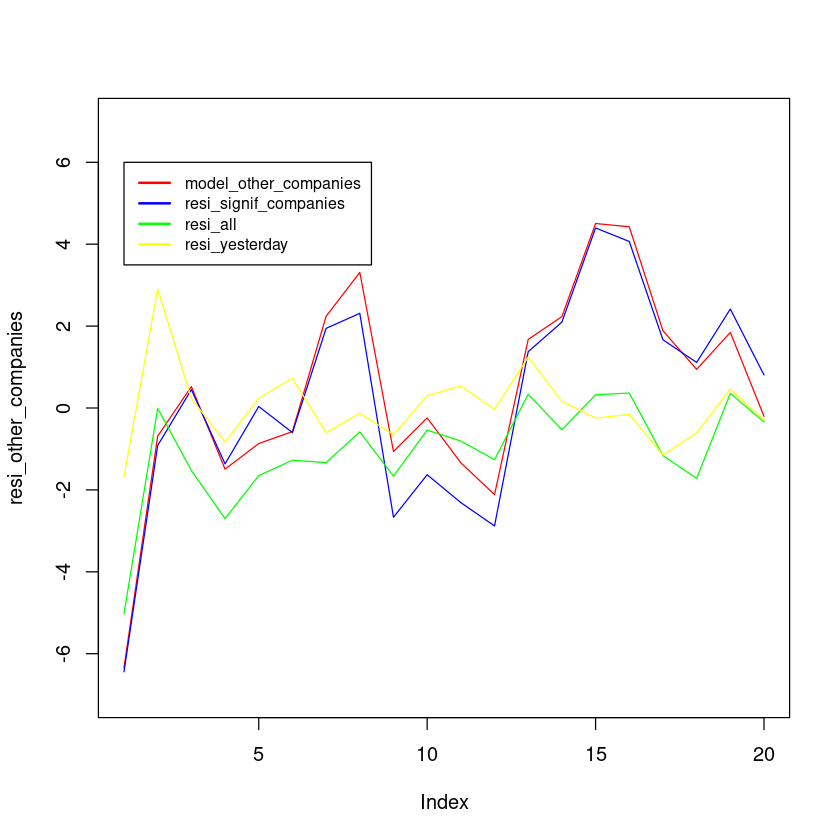

In [59]:
resi_other_companies<-y_real-predict(model_other_companies,df_to_pred)
resi_all<-y_real-predict(model_all,df_to_pred)
resi_yesterday <- y_real-predict(model_yesterday,df_to_pred)
resi_signif_companies<-y_real-predict(model_signif_companies,df_to_pred)

plot(resi_other_companies,type="l",col="red",ylim = c(-7,7))
lines(resi_signif_companies,col="blue")
lines(resi_all,col="green")
lines(resi_yesterday,col="yellow")
legend(1, 6, legend=c("model_other_companies", "resi_signif_companies","resi_all","resi_yesterday"),
       col=c("red", "blue","green","yellow"),lwd =2,cex=0.8)

Оскільки  у нас є як відємні відхилення так і додатні, то давайте використаємо якісь спеціальні метрики для нашої задачі. Можемо використати MAE чи MSE.

In [75]:
cat('MAE:\nother_companies: ',mae(y_real,predict(model_other_companies,df_to_pred)),
     '\nall :',mae(y_real,predict(model_all,df_to_pred)),
   '\nyesterday:',mae(y_real,predict(model_yesterday,df_to_pred)),
   '\nsignif_companies',mae(y_real,predict(model_signif_companies,df_to_pred)))

MAE:
other_companies:  1.925892 
all : 1.175799 
yesterday: 0.6596823 
signif_companies 2.074508

In [74]:
cat('MSE:\nother_companies: ',mse(y_real,predict(model_other_companies,df_to_pred)),
     '\nall :',mse(y_real,predict(model_all,df_to_pred)),
   '\nyesterday:',mse(y_real,predict(model_yesterday,df_to_pred)),
   '\nsignif_companies',mse(y_real,predict(model_signif_companies,df_to_pred)))

MSE:
other_companies:  6.165243 
all : 2.590996 
yesterday: 0.8711387 
signif_companies 6.497568

Доволі очікувано, що найкращі моделі розташувались в порядку:
1. yesterday
2. all
3. other_companies
4. signif_companies

#### Модель , де регресором виступає вчорашня ціна

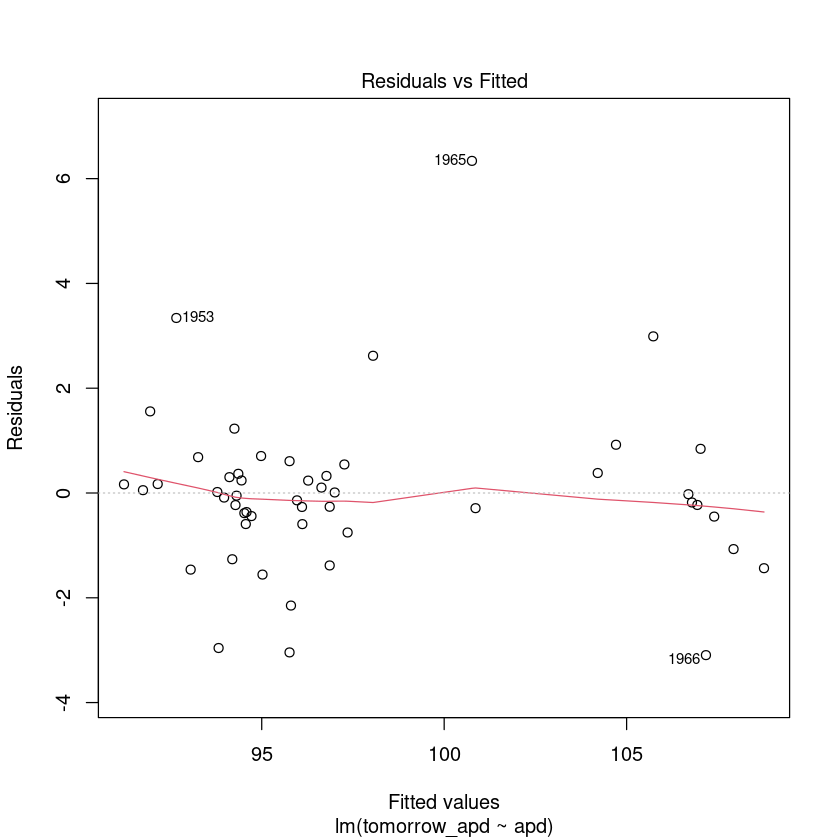

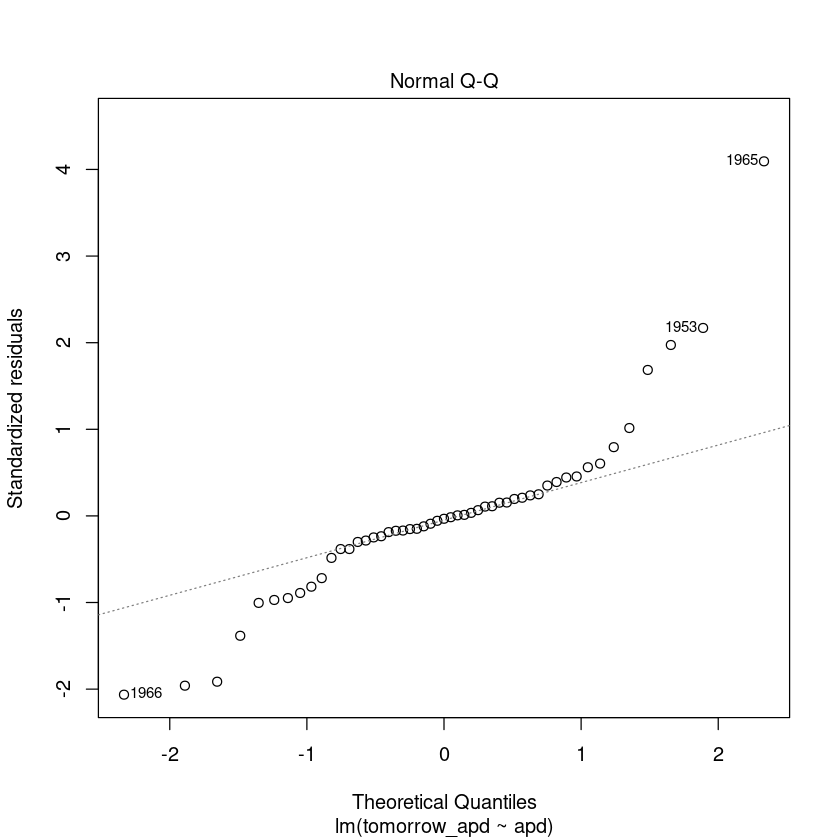

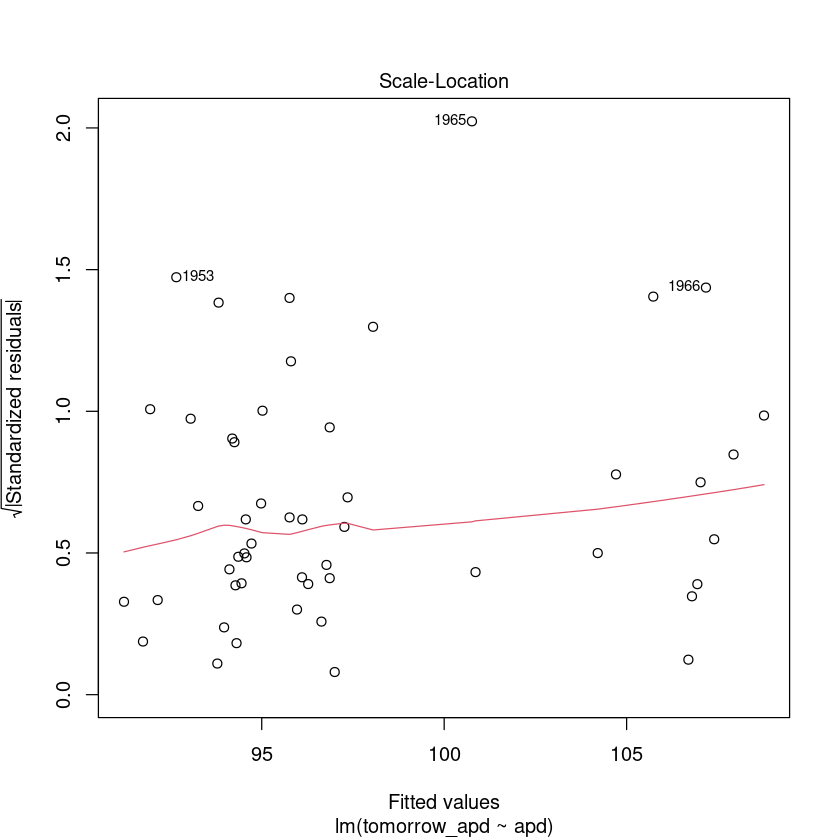

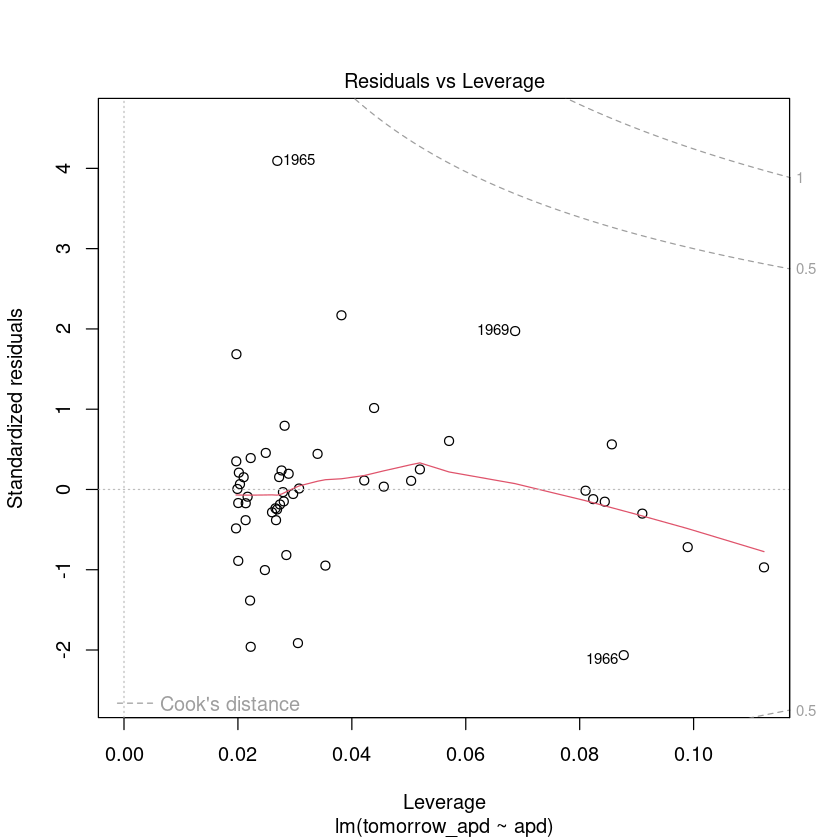

In [77]:
plot(model_yesterday)

In [79]:
shapiro.test(y_real-predict(model_yesterday,df_to_pred))


	Shapiro-Wilk normality test

data:  y_real - predict(model_yesterday, df_to_pred)
W = 0.91426, p-value = 0.07687


З графіка Q-Q plot не сильно зрозуміло, що наші залишки розподілені нормально , тому я нижче застосував тест Шапіро-Вілка. За його результатами можна прийняти нульову гіпотезу про те, що розподіл нормальний.

Графіки важілів говорить про те, що у нас немає точок які доволі сильно впиливають на наші коефіцієнти.
З графіку scale-location можна зробити висновок, що залишки гомоскедастичні

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
1953,2.2590418,0.03817366,0.09344594
1965,4.9947560,0.02691639,0.23176636
1966,-2.1376396,0.08773184,0.20480281
1970,-0.9697935,0.11235775,0.05959657
1973,-0.7147532,0.09896391,0.02833830


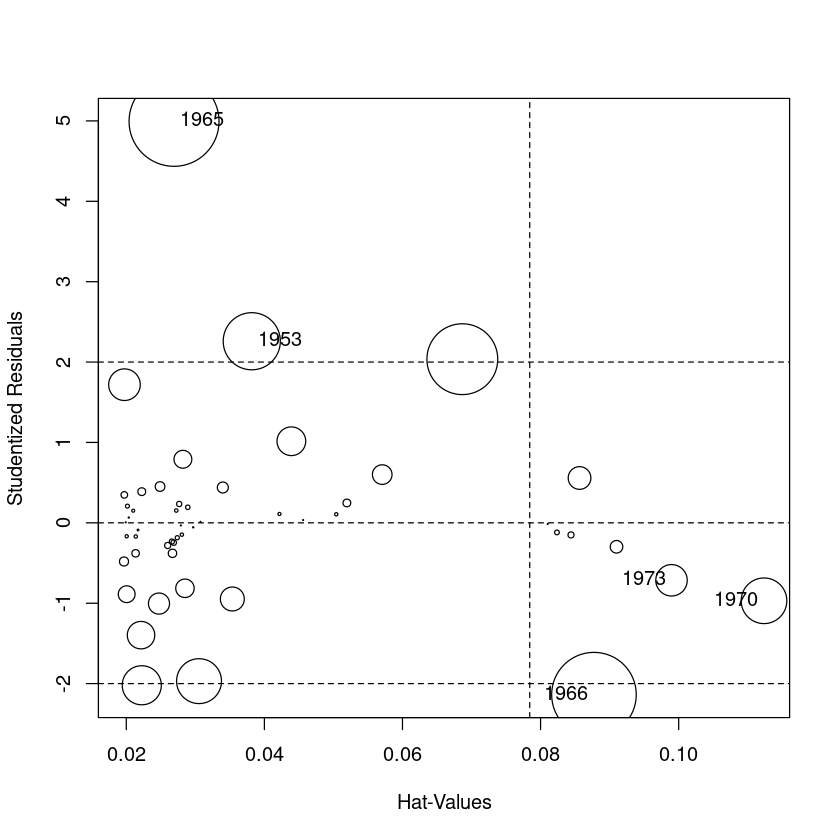

In [82]:
influencePlot(model_yesterday)

influencePlot нам показує, що все таки у нас є декілька точок, що сильно впливають на нашу модель значно більше ніж інші.

#### Модель де регресорами виступають всі інші компанії

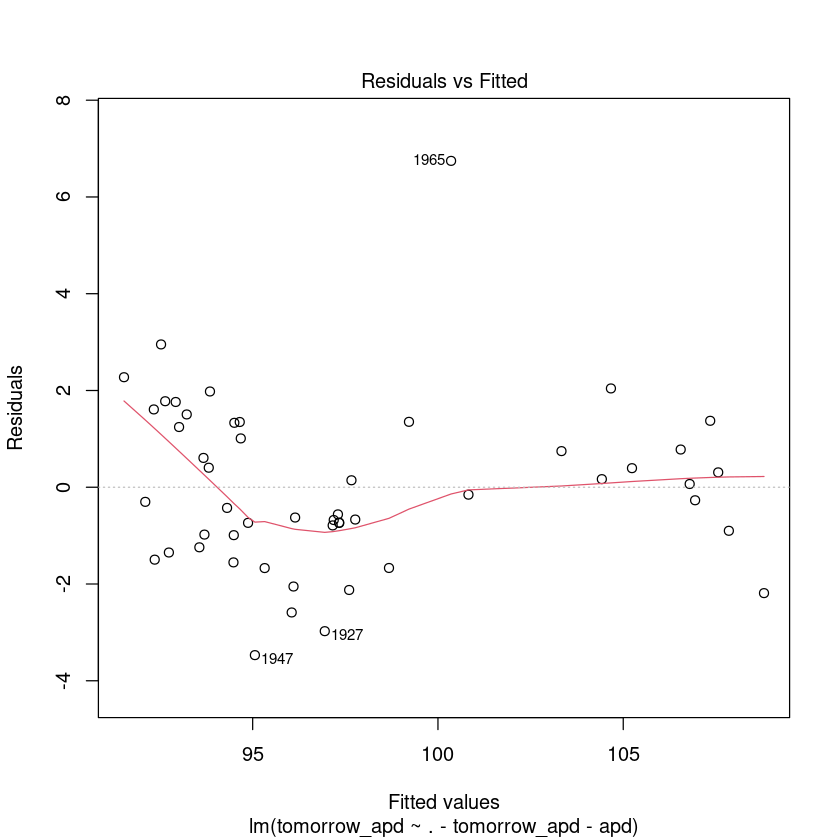

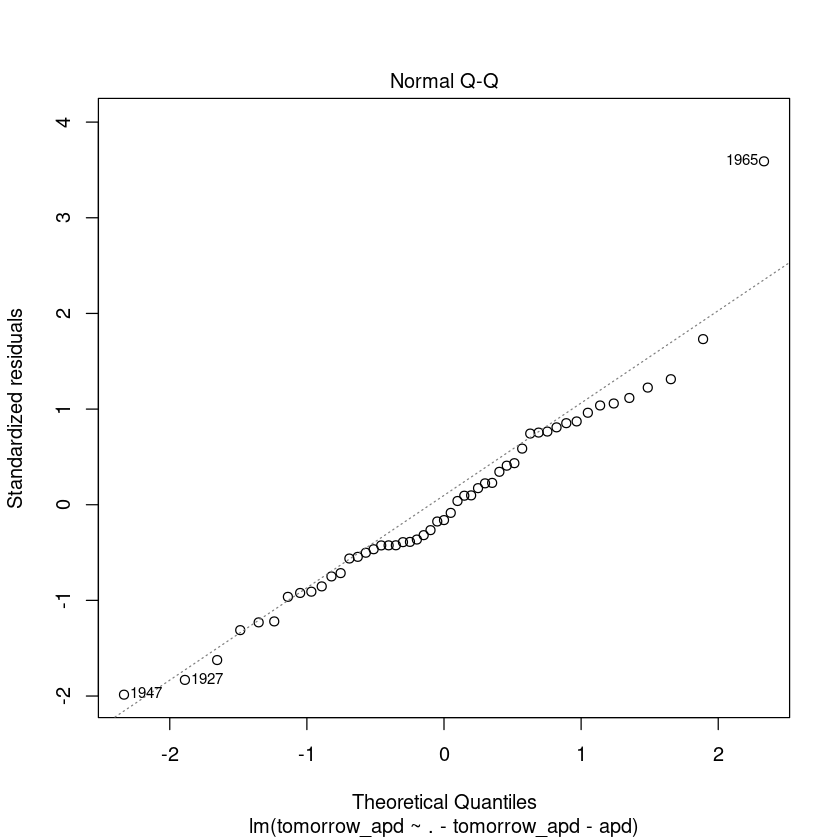

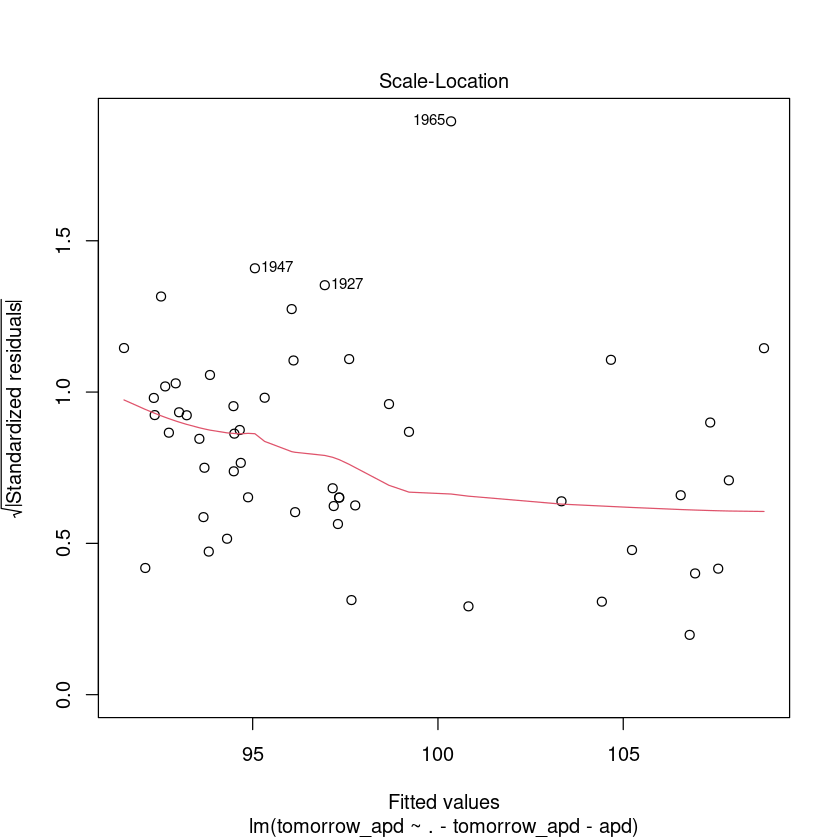

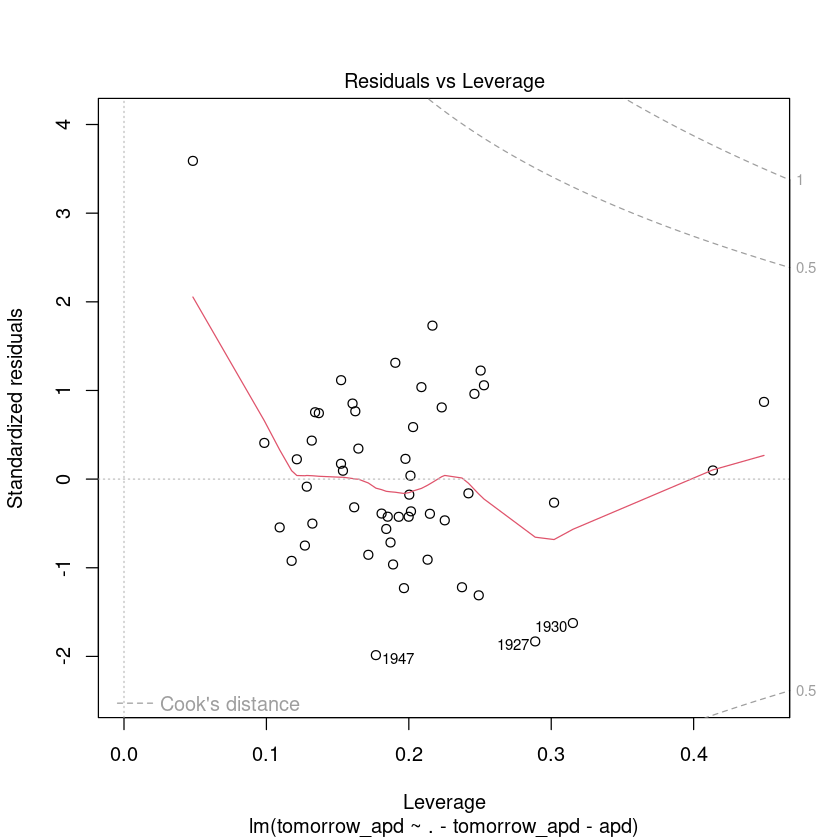

In [78]:
plot(model_other_companies)

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
1926,0.8682561,0.44940748,0.061904278
1927,-1.8875730,0.28874168,0.136130804
1930,-1.6579400,0.31522353,0.121357802
1947,-2.0629093,0.17687934,0.084720700
1962,0.0965251,0.41353377,0.000673242
1965,4.2822092,0.04837357,0.065511097


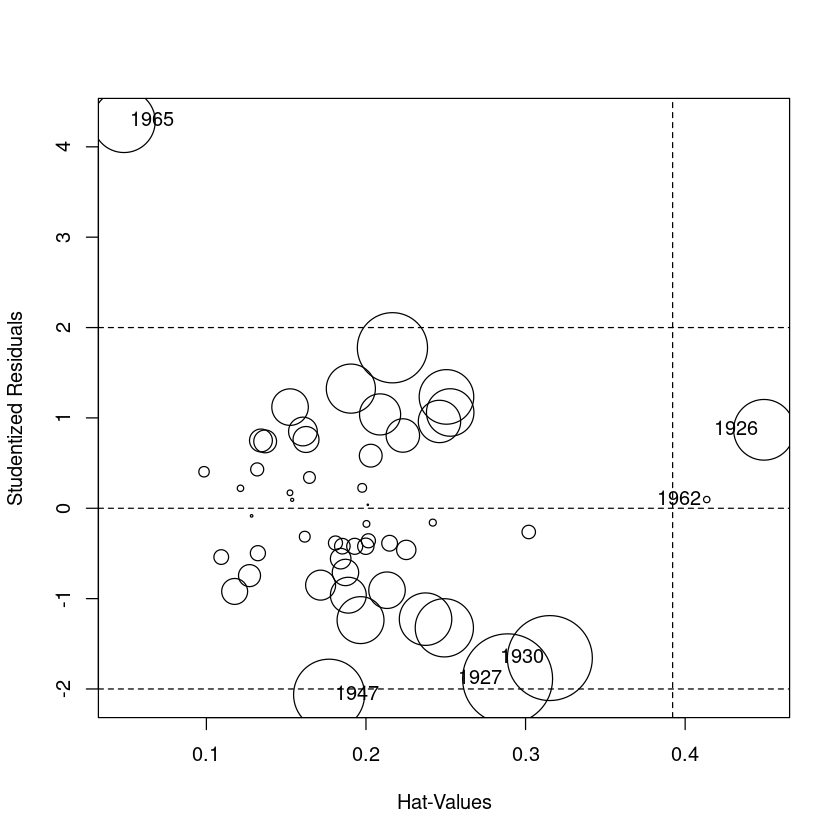

In [81]:
influencePlot(model_other_companies)

Аналогічно до попереднього випадку, influencePlot показав нам  6 точок, що доволі сильно впиливають на модель. 

In [80]:
shapiro.test(y_real-predict(model_other_companies,df_to_pred))


	Shapiro-Wilk normality test

data:  y_real - predict(model_other_companies, df_to_pred)
W = 0.94247, p-value = 0.2669


Проаналізуємо другу модель, де ми використовували всі інші компанії. За QQ-діаграмою та тестом на нормальність можна сказати,що у нас залишки  розподілені нормально.
Графік з важілями нам показує, що ніяких екстра впливових точок у нас немає.
Графік квадратів залишків показує, що у нас в цілому гомескедастичні дані.

#### Висновок

В цілому задача регресії, на мою думку, виконана. І в результах доволі непогані числа. Для того, щоб точно спрогнозувати значення все таки точність малувата, проте для окреслення приблизних меж використовувати можна.

Очевидно,що по всіх параметрах модель з вчорашнього дня впоралась краще

P.S. аналіз графіків був зроблений за рахунок статей про:
1. [QQ-plot](https://boostedml.com/2019/03/linear-regression-plots-how-to-read-a-qq-plot.html)
2. [The Scale Location Plot](https://boostedml.com/2019/03/linear-regression-plots-scale-location-plot.html)
3. [Residuals vs. Leverage Plot](https://www.statology.org/residuals-vs-leverage-plot/)
4. [Influence](https://rdrr.io/cran/car/man/influencePlot.html) [Plot](https://webpages.uidaho.edu/~renaes/431/Handouts/bubbleplot.pdf)